# microsim guide

This guide walks through some of the basic concepts of microsim, with examples

## Creating a sample

The simulation begins with some sort of sample or "ground truth".  This is
essentially a spatial distribution of signal-emitting objects.  `microsim`
provides a few built-in sample distributions, but you can also create your own.

The distribution is represented as a count of fluorophores in a 3-dimensional
space.  That space is referred to as the *truth space*.  So, a very basic sample
example, drawing some randomly oriented lines into a 64x256x256 space, with a
ground truth voxel size of 10nm x 10nm x 10nm, might look like this:

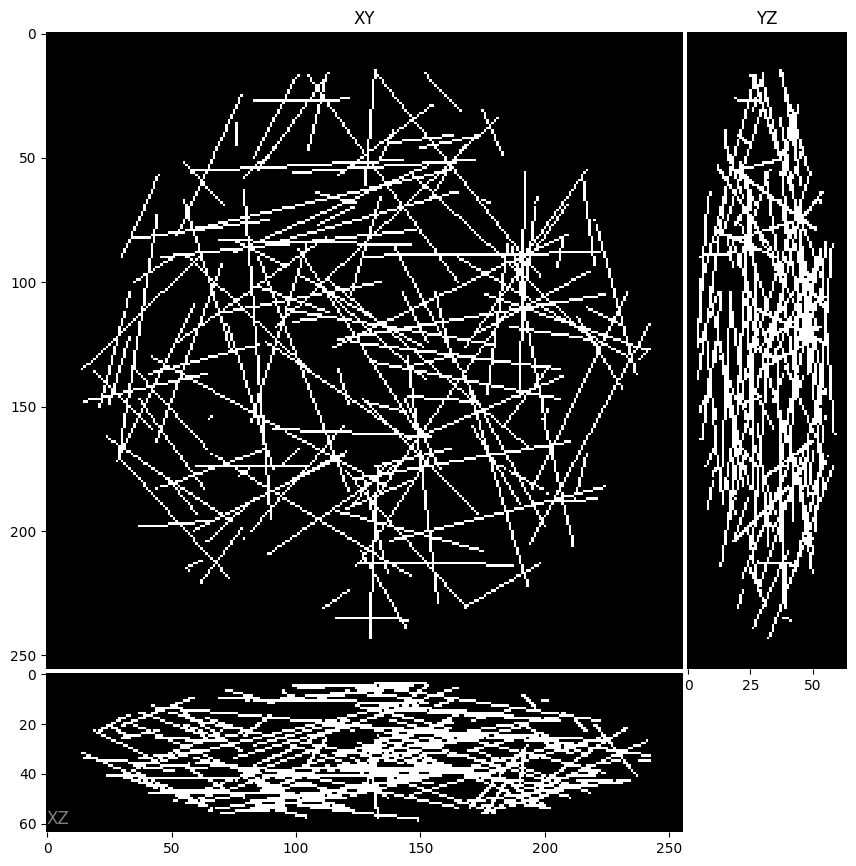

In [1]:
from microsim import schema as ms
from microsim.util import ortho_plot

sim = ms.Simulation(
    truth_space=ms.ShapeScaleSpace(shape=(64, 256, 256), scale=0.01),
    sample=[ms.MatsLines()],
)

ortho_plot(sim.ground_truth(), mip=True)

## Biologically realistic ground truth from Janelia CellMap

We can also create more biologically realistic ground truth.  For example,
microsim provides a wrapper around the Janelia
[OpenOrganelle](https://www.openorganelle.org) dataset, which is a rich dataset
of FIB-SEM images of cells, together with annotations of various organelles.
Let's simulate some ER, mitochondria, and lysosomes in a 3D space:

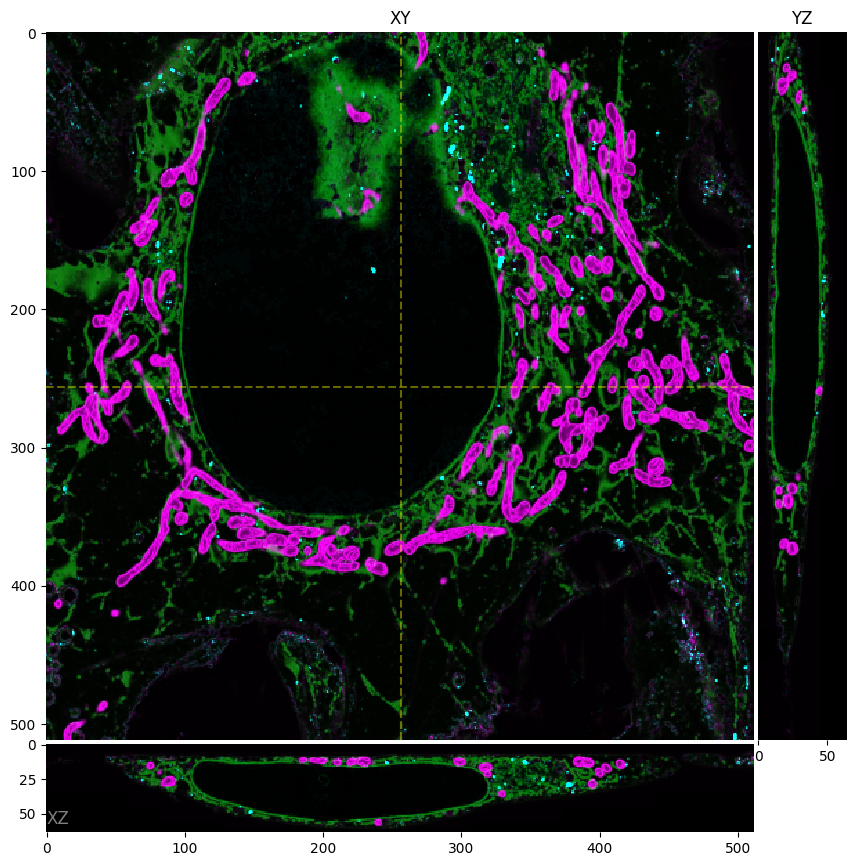

In [2]:
from microsim import schema as ms

sim = ms.Simulation(
    truth_space=ms.ShapeScaleSpace(
        shape=(64, 512, 512),
        scale=(0.064, 0.064, 0.064),
    ),
    # dataset & label names from https://openorganelle.janelia.org/datasets
    sample=[
        ms.CosemLabel(dataset="jrc_hela-3", label="er-mem_pred"),
        ms.CosemLabel(dataset="jrc_hela-3", label="mito-mem_pred"),
        ms.CosemLabel(dataset="jrc_hela-3", label="lyso_pred"),
    ],
)

ortho_plot(sim.ground_truth())

(or, plotted as maximum intensity projection):

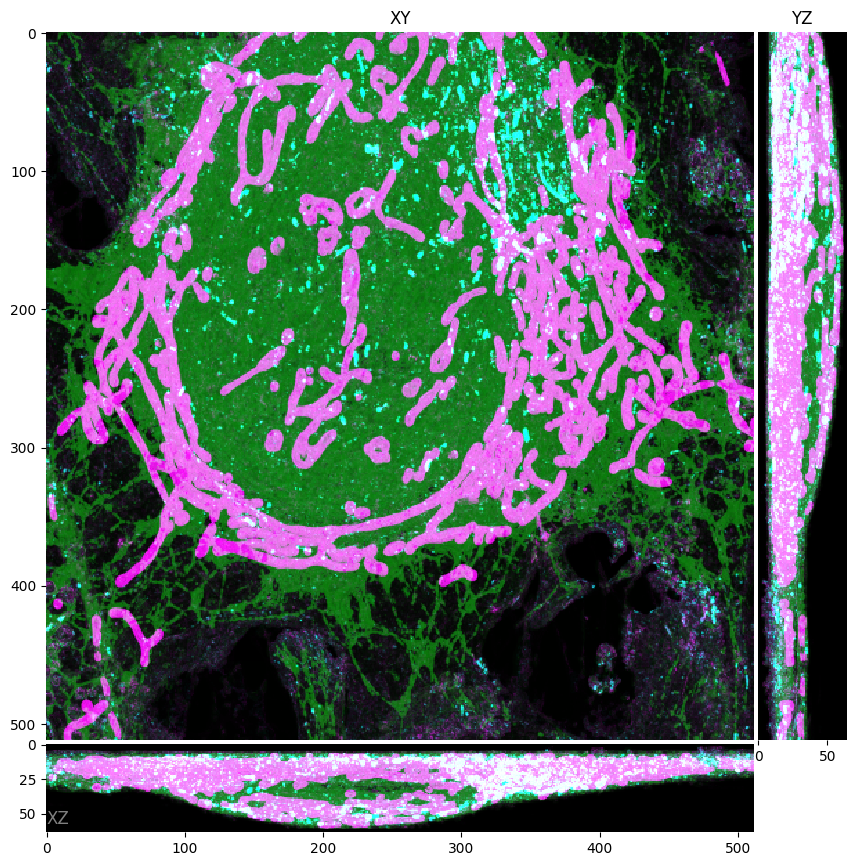

In [3]:
ortho_plot(sim.ground_truth(), mip=True)

Without any additional config, we can simulate an image as acquired by a
widefield microscope:

INFO:root:Rendering channel FITC -----------------
INFO:root:>> fluor mockFluorophore
INFO:root:>>>> @ 525.2525940250172 nm
INFO:root:Using cached PSF: /Users/talley/Library/Caches/microsim/psf/_1-515_1-515_170-0_170-0_1-515_1-515_1-0_1-4_1-47_150-0/64_57_0-064_0-064_0-5252525940250172.npy
INFO:root:NumpyAPI.fftconvolve a.shape=(64, 512, 512) b.shape=(65, 58, 58) a.dtype=dtype('float64')
INFO:root:>> fluor mockFluorophore
INFO:root:>>>> @ 525.2525940250172 nm
INFO:root:NumpyAPI.fftconvolve a.shape=(64, 512, 512) b.shape=(65, 58, 58) a.dtype=dtype('float64')
INFO:root:>> fluor mockFluorophore
INFO:root:>>>> @ 525.2525940250172 nm
INFO:root:NumpyAPI.fftconvolve a.shape=(64, 512, 512) b.shape=(65, 58, 58) a.dtype=dtype('float64')


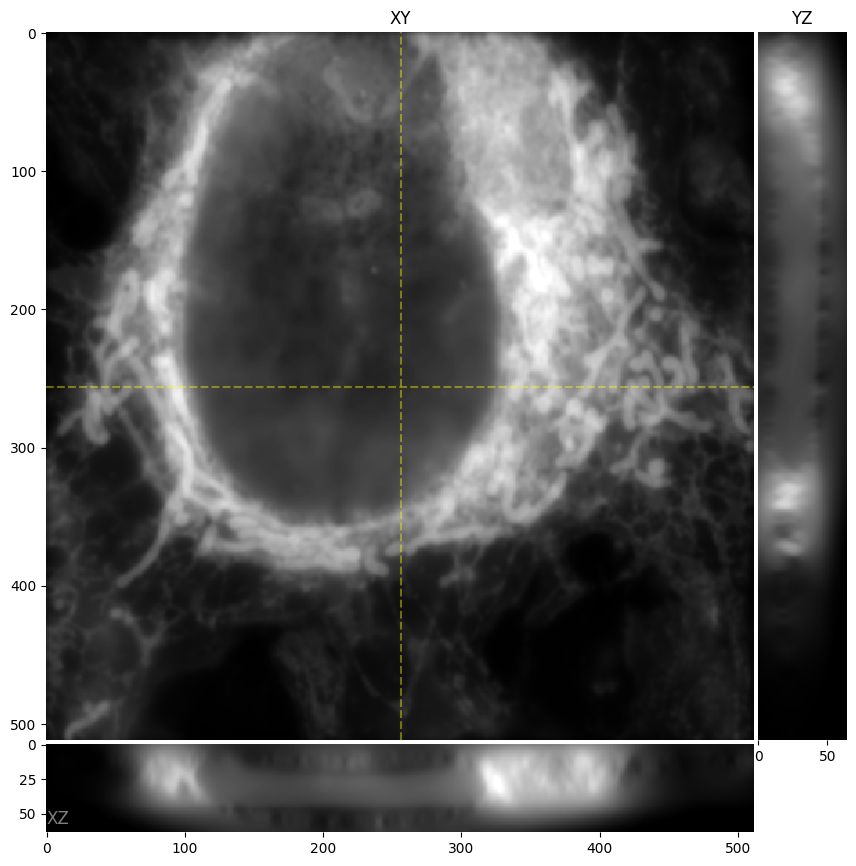

In [4]:
result = sim.digital_image()

ortho_plot(result)

interesting ... looks more or less like a widefield image of a cell.
But there's something wrong: all of the organelles are in the same channel!
Let's add the concept of fluorophores and optical configurations.

# Fluorophores, Spectra, and Optical Configurations

In [7]:
from microsim import schema as ms
from microsim.schema.optical_config import lib

sim = ms.Simulation(
    truth_space=ms.ShapeScaleSpace(
        shape=(64, 512, 512),
        scale=(0.064, 0.064, 0.064),
    ),
    # dataset & label names from https://openorganelle.janelia.org/datasets
    sample=[
        ms.FluorophoreDistribution(
            distribution=ms.CosemLabel(dataset="jrc_hela-3", label="er-mem_pred"),
            fluorophore="EGFP",
        ),
        ms.FluorophoreDistribution(
            distribution=ms.CosemLabel(dataset="jrc_hela-3", label="mito-mem_pred"),
            fluorophore="mCherry",
        ),
        ms.FluorophoreDistribution(
            distribution=ms.CosemLabel(dataset="jrc_hela-3", label="lyso_pred"),
            fluorophore="Alexa Fluor 647",
        ),
    ],
    channels=[lib.FITC, lib.TRITC, lib.CY7],
)

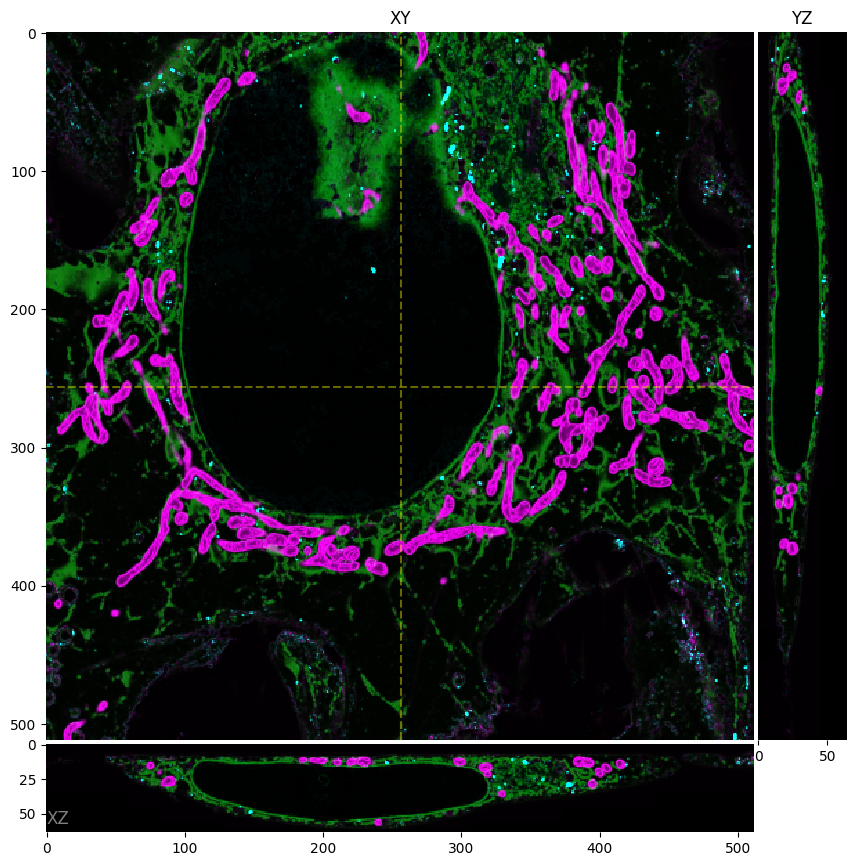

In [8]:
ortho_plot(sim.ground_truth())

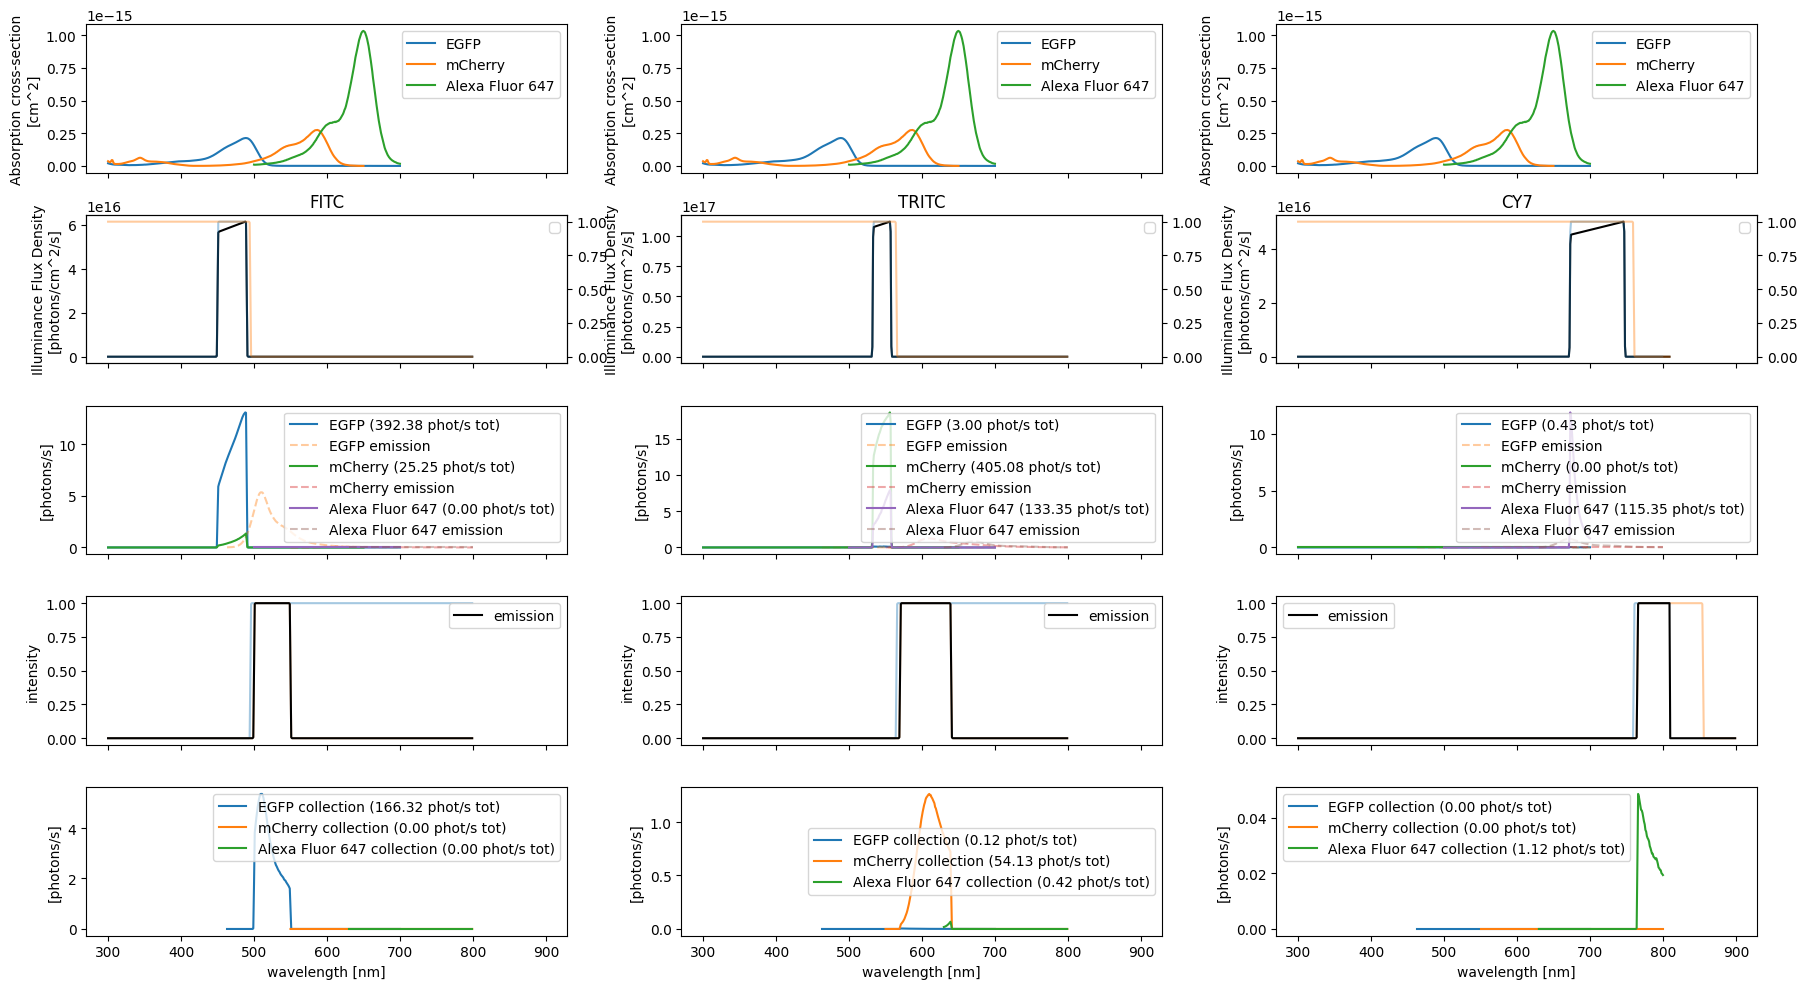

In [9]:
sim.plot()